<a href="https://colab.research.google.com/github/angelinakhatiwada/Urban-Sound-Classification/blob/main/FNN_RNN_CNN_Classification_Mels_(512).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Urban Sound Classification

## Classification

### Mels features 128 x 4



In [65]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1)

import os

import pickle

In [66]:
# Libraries for Classification and building Models

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Conv2D, Flatten, Dense, MaxPool2D, Dropout, LSTM
from tensorflow.keras.utils import to_categorical 

### Data import from pickle

In [68]:
with open('features_mels_512.p', 'rb') as f:
    data = pickle.load(f)

In [69]:
data.head()

,features,shape,label,fold,file_name
0,"[6.7016525e-05, 0.0002738931, 0.00043046506, 0...","(512,)",3,5,100032-3-0-0.wav
1,"[0.046293005, 0.046115912, 0.031325452, 0.0162...","(512,)",2,5,100263-2-0-117.wav
2,"[0.028046967, 0.03285183, 0.030295085, 0.01307...","(512,)",2,5,100263-2-0-121.wav
3,"[0.025350068, 0.04161336, 0.037191, 0.04856568...","(512,)",2,5,100263-2-0-126.wav
4,"[0.05126126, 0.035394225, 0.01814437, 0.013484...","(512,)",2,5,100263-2-0-137.wav


In [70]:
data_final = list(data['features'])
data_final = pd.DataFrame(data_final)
data_cols = data_final.columns
data_final['label'] = data['label']
data_final['fold'] = data['fold']

print(data_final.shape)


(8732, 514)


In [71]:
dummies = pd.get_dummies(data_final['label']).rename(columns=lambda x: 'label_' + str(x))
data_final = pd.concat([data_final, dummies], axis=1)
data_final.drop(['label'], inplace=True, axis=1)
data_final.shape

(8732, 523)

In [72]:
def df_transform(fold):
  X_fold_df = data_final[data_final['fold'].isin(fold)]
  X = X_fold_df.iloc[:, 0:512].to_numpy()
  y = X_fold_df.iloc[:, 513:523].to_numpy()

  return X, y

In [129]:
X_train, y_train = df_transform(['1','2','3','4','6'])
X_train.shape, y_train.shape

((4499, 512), (4499, 10))

In [130]:
X_val, y_val = df_transform(['5'])
X_val.shape, y_val.shape

((936, 512), (936, 10))

In [131]:
X_test7, y_test7 = df_transform(['7'])
X_test8, y_test8 = df_transform(['8'])
X_test9, y_test9 = df_transform(['9'])
X_test10, y_test10 = df_transform(['10'])

## Classification

In [76]:
def plot_accuracy(history):
  #accuracy
  plt.figure(figsize=(8,3))
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'val'], loc='upper left')
  plt.show()

  #loss
  plt.figure(figsize=(8,3))
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'val'], loc='upper left')
  plt.show()

In [77]:
def test_scores(model):
  score5 = model.evaluate(X_val, y_val)
  score7 = model.evaluate(X_test7, y_test7)
  score8 = model.evaluate(X_test8, y_test8)
  score9 = model.evaluate(X_test9, y_test9)
  score10 = model.evaluate(X_test10, y_test10)
  test_scores = [score5[1],score7[1],score8[1],score9[1],score10[1]]
  
  return test_scores

### CNN model

In [78]:
# data reshaping for CNN
X_train = X_train.reshape(X_train.shape[0],128,4,1)
X_val = X_val.reshape(X_val.shape[0],128,4,1)
X_test7 = X_test7.reshape(X_test7.shape[0],128,4,1)
X_test8 = X_test8.reshape(X_test8.shape[0],128,4,1)
X_test9 = X_test9.reshape(X_test9.shape[0],128,4,1)
X_test10 = X_test10.reshape(X_test10.shape[0],128,4,1)

In [79]:
model = Sequential()
input_dim = (128,4,1)

model.add(Conv2D(64, (3, 3), padding = "same", activation = "relu", input_shape = input_dim))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.2))

model.add(Dense(512,activation="relu"))
model.add(Dropout(0.2))

model.add(Dense(10, activation = "softmax"))

model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 128, 4, 64)        640       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 64, 2, 64)        0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 64, 2, 128)        73856     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 32, 1, 128)       0         
 2D)                                                             
                                                                 
 dropout_28 (Dropout)        (None, 32, 1, 128)        0         
                                                                 
 flatten_1 (Flatten)         (None, 4096)             

In [80]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [81]:
history = model.fit(X_train, y_train, epochs = 30, batch_size = 128, validation_data =(X_val, y_val), verbose =True)

Epoch 1/30
36/36 [==============================] - 10s 259ms/step - loss: 3.7390 - accuracy: 0.2354 - val_loss: 2.1983 - val_accuracy: 0.2596
Epoch 2/30
36/36 [==============================] - 9s 250ms/step - loss: 2.0506 - accuracy: 0.3299 - val_loss: 1.9565 - val_accuracy: 0.3120
Epoch 3/30
36/36 [==============================] - 9s 258ms/step - loss: 1.7796 - accuracy: 0.4128 - val_loss: 1.8747 - val_accuracy: 0.3184
Epoch 4/30
36/36 [==============================] - 9s 253ms/step - loss: 1.6338 - accuracy: 0.4572 - val_loss: 1.8859 - val_accuracy: 0.3654
Epoch 5/30
36/36 [==============================] - 9s 254ms/step - loss: 1.4850 - accuracy: 0.4934 - val_loss: 1.8089 - val_accuracy: 0.4327
Epoch 6/30
36/36 [==============================] - 9s 254ms/step - loss: 1.4400 - accuracy: 0.5259 - val_loss: 1.8211 - val_accuracy: 0.4327
Epoch 7/30
36/36 [==============================] - 9s 254ms/step - loss: 1.3040 - accuracy: 0.5695 - val_loss: 1.7065 - val_accuracy: 0.4455
Epoch

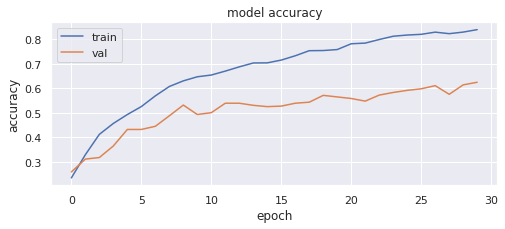

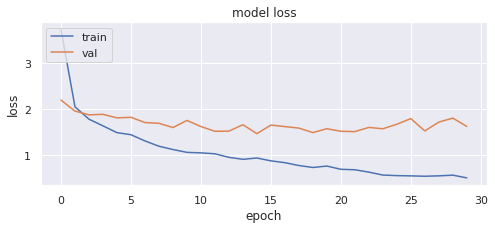

In [82]:
plot_accuracy(history)

In [83]:
test_scores_cnn = test_scores(model)
test_scores_cnn

27/27 [==============================] - 1s 18ms/step - loss: 1.6137 - accuracy: 0.6022


[0.625,
 0.5059666037559509,
 0.5632754564285278,
 0.5453431606292725,
 0.602150559425354]

In [84]:
print((np.mean(test_scores_cnn), np.std(test_scores_cnn)))

(0.568347156047821, 0.04194866876137509)


### FNN

In [88]:
# data reshaping for NN
X_train = X_train.reshape(X_train.shape[0], 512)
X_val = X_val.reshape(X_val.shape[0],512)
X_test7 = X_test7.reshape(X_test7.shape[0],512)
X_test8 = X_test8.reshape(X_test8.shape[0],512)
X_test9 = X_test9.reshape(X_test9.shape[0],512)
X_test10 = X_test10.reshape(X_test10.shape[0],512)

In [89]:
X_train.shape, X_val.shape

((4499, 512), (936, 512))

In [120]:
#forming model
model=Sequential()

#building the model
model.add(Dense(units=512,activation='relu',input_dim=512))
model.add(Dropout(0.1))
model.add(Dense(units=256,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(units=128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(units=64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(units=10,activation='softmax'))
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_63 (Dense)            (None, 512)               262656    
                                                                 
 dropout_51 (Dropout)        (None, 512)               0         
                                                                 
 dense_64 (Dense)            (None, 256)               131328    
                                                                 
 dropout_52 (Dropout)        (None, 256)               0         
                                                                 
 dense_65 (Dense)            (None, 128)               32896     
                                                                 
 dropout_53 (Dropout)        (None, 128)               0         
                                                                 
 dense_66 (Dense)            (None, 64)              

In [121]:
#compiling
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [122]:
history = model.fit(X_train,y_train,epochs=30 ,batch_size=64, validation_data = (X_val, y_val))

Epoch 1/30
71/71 [==============================] - 1s 11ms/step - loss: 6.5223 - accuracy: 0.2140 - val_loss: 3.1246 - val_accuracy: 0.2244
Epoch 2/30
71/71 [==============================] - 1s 9ms/step - loss: 3.0245 - accuracy: 0.2721 - val_loss: 2.3319 - val_accuracy: 0.2393
Epoch 3/30
71/71 [==============================] - 1s 9ms/step - loss: 2.5171 - accuracy: 0.3005 - val_loss: 2.2525 - val_accuracy: 0.2746
Epoch 4/30
71/71 [==============================] - 1s 9ms/step - loss: 2.1682 - accuracy: 0.3412 - val_loss: 2.0978 - val_accuracy: 0.3130
Epoch 5/30
71/71 [==============================] - 1s 9ms/step - loss: 2.0623 - accuracy: 0.3652 - val_loss: 2.2053 - val_accuracy: 0.3109
Epoch 6/30
71/71 [==============================] - 1s 9ms/step - loss: 1.8942 - accuracy: 0.3930 - val_loss: 2.1910 - val_accuracy: 0.3355
Epoch 7/30
71/71 [==============================] - 1s 9ms/step - loss: 1.7795 - accuracy: 0.4392 - val_loss: 2.2568 - val_accuracy: 0.3472
Epoch 8/30
71/71 [=

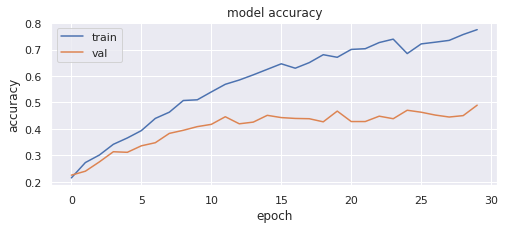

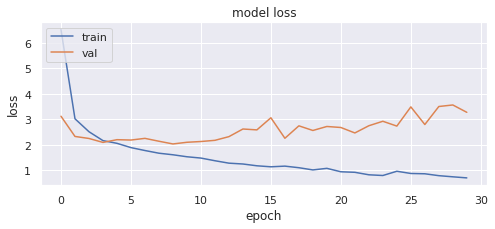

In [123]:
plot_accuracy(history)

In [127]:
test_scores_fnn = test_scores(model)
test_scores_fnn

27/27 [==============================] - 0s 3ms/step - loss: 2.7450 - accuracy: 0.4994


[0.4893162250518799,
 0.5190930962562561,
 0.53722083568573,
 0.5514705777168274,
 0.49940264225006104]

In [128]:
print((np.mean(test_scores_fnn), np.std(test_scores_fnn)))

(0.5193006753921509, 0.02302640586264534)


### RNN

In [132]:
# data reshaping for RNN
X_train = X_train.reshape(X_train.shape[0],128,4)
X_val = X_val.reshape(X_val.shape[0],128,4)
X_test7 = X_test7.reshape(X_test7.shape[0],128,4)
X_test8 = X_test8.reshape(X_test8.shape[0],128,4)
X_test9 = X_test9.reshape(X_test9.shape[0],128,4)
X_test10 = X_test10.reshape(X_test10.shape[0],128,4)

In [139]:
# Neural network model
input_shape = (128,4)

model = Sequential()
model.add(LSTM(128,input_shape=input_shape, dropout = 0.2, recurrent_dropout = 0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 128)               68096     
                                                                 
 dense_72 (Dense)            (None, 128)               16512     
                                                                 
 dropout_58 (Dropout)        (None, 128)               0         
                                                                 
 dense_73 (Dense)            (None, 64)                8256      
                                                                 
 dropout_59 (Dropout)        (None, 64)                0         
                                                                 
 dense_74 (Dense)            (None, 32)                2080      
                                                                 
 dropout_60 (Dropout)        (None, 32)              

In [140]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [141]:
history = model.fit(X_train,y_train,epochs=50 ,batch_size=256, validation_data = (X_val, y_val))

Epoch 1/50
18/18 [==============================] - 18s 842ms/step - loss: 2.2809 - accuracy: 0.1320 - val_loss: 2.2890 - val_accuracy: 0.1421
Epoch 2/50
18/18 [==============================] - 15s 818ms/step - loss: 2.2088 - accuracy: 0.1694 - val_loss: 2.2378 - val_accuracy: 0.1400
Epoch 3/50
18/18 [==============================] - 15s 825ms/step - loss: 2.1417 - accuracy: 0.1956 - val_loss: 2.1393 - val_accuracy: 0.1912
Epoch 4/50
18/18 [==============================] - 15s 821ms/step - loss: 2.0515 - accuracy: 0.2501 - val_loss: 2.0401 - val_accuracy: 0.1635
Epoch 5/50
18/18 [==============================] - 15s 816ms/step - loss: 1.9871 - accuracy: 0.2794 - val_loss: 2.0156 - val_accuracy: 0.1752
Epoch 6/50
18/18 [==============================] - 15s 813ms/step - loss: 1.9448 - accuracy: 0.2912 - val_loss: 1.9959 - val_accuracy: 0.2083
Epoch 7/50
18/18 [==============================] - 15s 816ms/step - loss: 1.9093 - accuracy: 0.3007 - val_loss: 1.9768 - val_accuracy: 0.1880

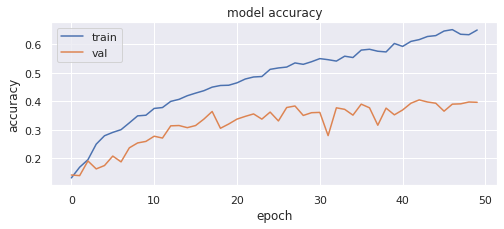

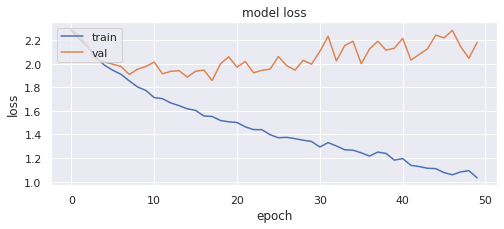

In [143]:
plot_accuracy(history)

In [144]:
test_scores_rnn = test_scores(model)
test_scores_rnn

27/27 [==============================] - 1s 33ms/step - loss: 1.9630 - accuracy: 0.4170


[0.39636752009391785,
 0.4439140856266022,
 0.45285359025001526,
 0.406862735748291,
 0.4169653654098511]

In [145]:
print((np.mean(test_scores_rnn), np.std(test_scores_rnn)))

(0.42339265942573545, 0.021605471619029915)
